In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# Prepare  MNIST Data

# MNIST Dataset
train_dataset = datasets.MNIST(root='./_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./_data/', train=False, transform=transforms.ToTensor(), download=False)

# Data Loader (Input Pipeline)
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

train_loader

In [3]:
# VAE Implementation
class VAE(nn.Module) :
    def __init__(self, input_dim, hidden_dim=[512, 256, 2]) :
        super(VAE, self).__init__()

        self.init_encoder(input_dim, hidden_dim)
        self.init_decoder(input_dim, hidden_dim)

    def init_encoder(self, input_dim, hidden_dim) :
        self.encoder = nn.ModuleDict()
        self.encoder["fc1"] = nn.Linear(input_dim, hidden_dim[0])
        self.encoder["fc2"] = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.encoder["mu"] = nn.Linear(hidden_dim[1], hidden_dim[2])
        self.encoder["logvar"] = nn.Linear(hidden_dim[1], hidden_dim[2])

    def init_decoder(self, input_dim, hidden_dim) :
        self.decoder = nn.ModuleDict()
        self.decoder["fc1"] = nn.Linear(hidden_dim[-1], hidden_dim[-2])
        self.decoder["fc2"] = nn.Linear(hidden_dim[-2], hidden_dim[-3])
        self.decoder["fc3"] = nn.Linear(hidden_dim[-3], input_dim)

    def encode(self, x) :
        x = self.encoder["fc1"](x)
        x = F.relu(x)
        x = self.encoder["fc2"](x)
        x = F.relu(x)
        mu = self.encoder["mu"](x) 
        logvar = self.encoder["logvar"](x)
        
        return mu, logvar
    
    def sample(self, mu, logvar) :
        sigma = torch.exp(0.5*logvar)
        eps = torch.randn_like(sigma)
        
        return mu + torch.mul(eps, sigma)

    def decode(self, x) :
        x = self.decoder["fc1"](x)
        x = F.relu(x)
        x = self.decoder['fc2'](x)
        x = F.relu(x)
        x = self.decoder["fc3"](x)
        x = F.sigmoid(x)

        return x

    def forward(self, x) :
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.sample(mu, logvar)
        h = self.decode(z)
        return h, mu, logvar

variational_autoencoder = VAE(input_dim=784)
optimizer = optim.Adam(variational_autoencoder.parameters(), lr=0.01)

In [4]:
# Loss Function
def loss_ftn(x_generated, x_real, mu, logvar) :
    BCE = nn.BCELoss(reduction="sum")
    loss_1 = BCE(x_generated, x_real.view(-1, 784))
    loss_2 = -0.5*torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return loss_1 + loss_2

In [5]:
# Train
max_epochs = 10
train_loss_list = []
for epoch in range(max_epochs) :
    train_loss = 0.0
    for x, _ in train_loader :
        optimizer.zero_grad()

        x_generated, mu, logvar = variational_autoencoder(x)
        loss = loss_ftn(x_generated, x, mu, logvar)
        loss.backward()
        train_loss += loss.item()

        optimizer.step()
    train_loss_list.append(train_loss)
    print(f"Epoch : {epoch} Loss: {train_loss}")

NameError: name 'log_var' is not defined

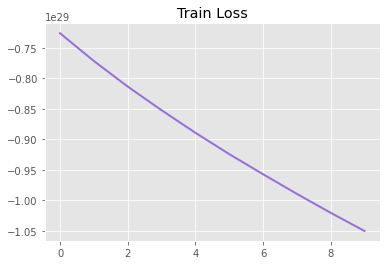

In [12]:
style.use("ggplot")
plt.title("Train Loss")
plt.plot(train_loss_list, linewidth=2.0, color="mediumpurple")
plt.savefig("loss.png")

In [14]:
# Generate Image
z = torch.randn(64, 2)
sample = variational_autoencoder.decode(z)
print(sample[0])
save_image(sample.view(64, 1, 28, 28), "sample.png")

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 